In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from ggplot import *
from altair import *

In [2]:
df = pd.read_csv('data/iris-species/Iris.csv')

In [23]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
36,37,5.5,3.5,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
91,92,6.1,3.0,4.6,1.4,Iris-versicolor


In [25]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Try out altair

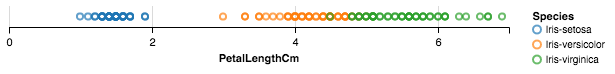

In [57]:
Chart(df).mark_point().encode(
    x=df.keys()[3],
    color='Species:N'
)

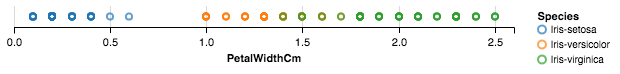

In [58]:
Chart(df).mark_point().encode(
    x=df.keys()[4],
    color='Species:N'
)

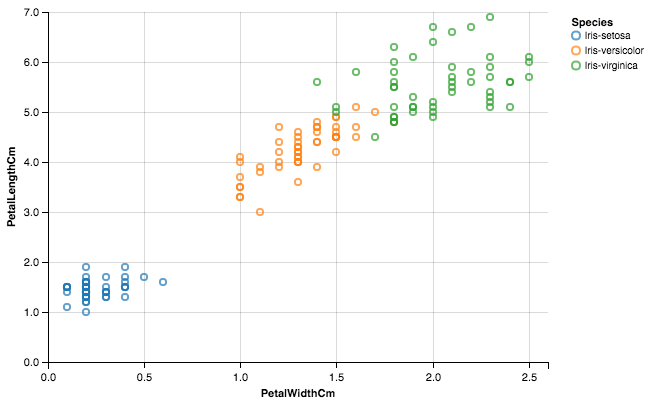

In [103]:
Chart(df).mark_point().encode(
    x='PetalWidthCm',
    y='PetalLengthCm',
    color='Species'
)

### Try out pandas.plotting

In [12]:
import matplotlib
matplotlib.style.use('ggplot')
from pandas.plotting import parallel_coordinates, andrews_curves, scatter_matrix, radviz

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118e087b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118f3ce10>], dtype=object)

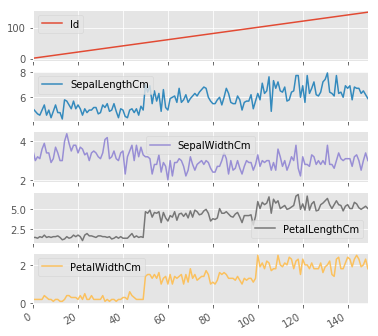

In [13]:
df.plot(subplots=True, figsize=(6, 6))

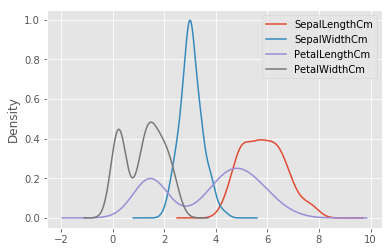

In [16]:
df[df.keys()[1:-1]].plot.kde()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b6085f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bc23860>]], dtype=object)

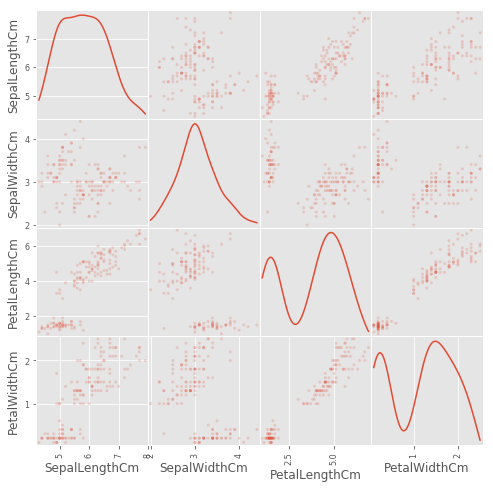

In [23]:
scatter_matrix(df[df.keys()[1:-1]], alpha=0.2, figsize=(8,8), diagonal='kde')

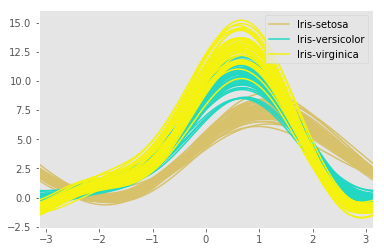

In [14]:
andrews_curves(df[df.keys()[1:]], 'Species')

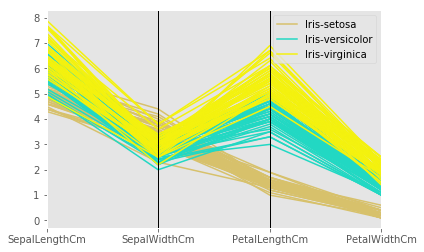

In [10]:
parallel_coordinates(df[df.keys()[1:]], 'Species')

In [101]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
le = LabelEncoder()
t = le.fit(df['Species'])
d = t.transform(df['Species'])

In [78]:
df['target'] = d

In [93]:
X = np.asarray(df[['PetalWidthCm', 'PetalLengthCm']])
y = np.asarray(df['target'])

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [102]:
# scale the data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### visualize decision boundary for multiple machine learning algorithms

In [106]:
# https://www.kaggle.com/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset
from matplotlib.colors import ListedColormap
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [107]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [109]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
print(svm.score(X_train_std, y_train))
print(svm.score(X_test_std, y_test))

0.952380952381
0.977777777778


In [110]:
knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))

0.961904761905
0.977777777778


In [112]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_std, y_train)
print(xgb_clf.score(X_train_std, y_train))
print(xgb_clf.score(X_test_std, y_test))

0.980952380952
0.977777777778


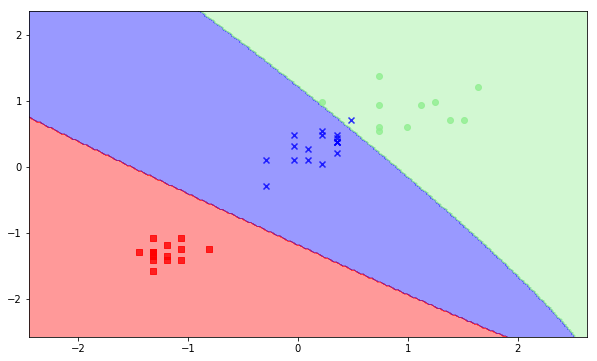

In [119]:
plot_decision_regions(X_test_std, y_test, svm)

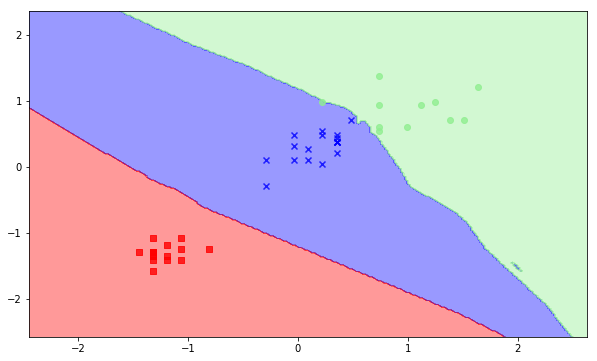

In [115]:
plot_decision_regions(X_test_std, y_test, knn)

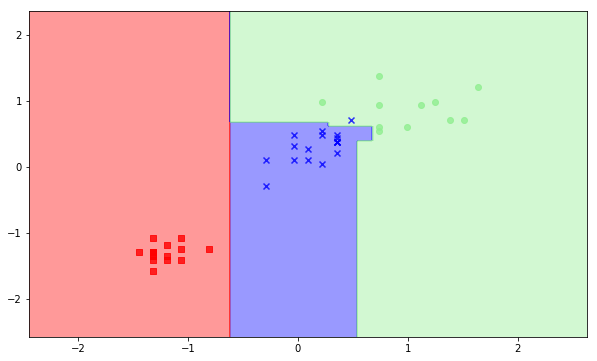

In [116]:
plot_decision_regions(X_test_std, y_test, xgb_clf)